In [1]:
import matplotlib.pyplot as plt
import json

In [7]:
with open('../out/robustness_study/results_bert_teacher.json', 'r') as f:
    results_bert_teacher = json.load(f)
with open('../out/robustness_study/results_bert_student.json', 'r') as f:
    results_bert_student = json.load(f)

def plot_noise_type(noise_type: str):    
    # Extract F1 and ECE scores for both models
    levels = sorted(results_bert_teacher[noise_type].keys())
    f1_scores_teacher = [results_bert_teacher[noise_type][level]['f1_score'] for level in levels]
    f1_scores_student = [results_bert_student[noise_type][level]['f1_score'] for level in levels]
    ece_scores_teacher = [results_bert_teacher[noise_type][level]['ece_score'] for level in levels]
    ece_scores_student = [results_bert_student[noise_type][level]['ece_score'] for level in levels]
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 8))
    
    # F1 Scores
    ax1.set_xlabel('Noise Level')
    ax1.set_ylabel('F1 Score', color='tab:blue')
    ax1.plot(levels, f1_scores_teacher, label='Teacher F1', marker='o', color='tab:blue')
    ax1.plot(levels, f1_scores_student, label='Student F1', marker='x', linestyle='--', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  
    ax2.set_ylabel('ECE', color='tab:red')  # we already handled the x-label with ax1
    ax2.plot(levels, ece_scores_teacher, label='Teacher ECE', marker='o', color='tab:red')
    ax2.plot(levels, ece_scores_student, label='Student ECE', marker='x', linestyle='--', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    
    # Combined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')
    
    plt.title('Performance Comparison for "ppr" Noise Type')
    plt.show()

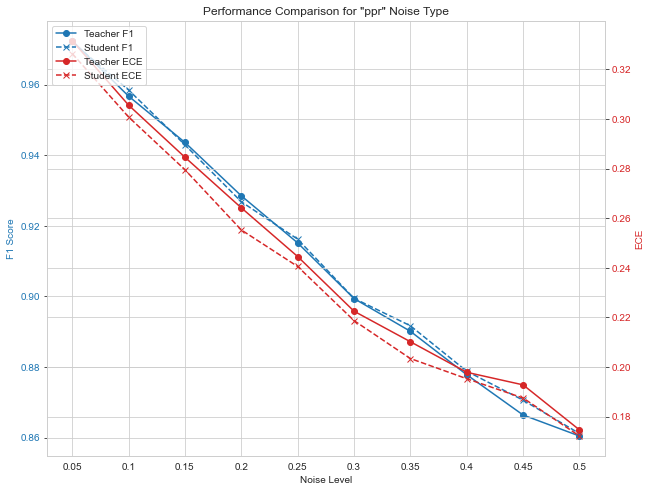

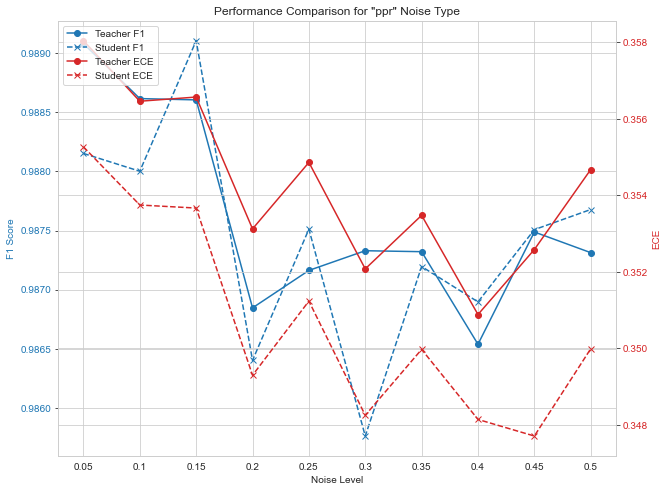

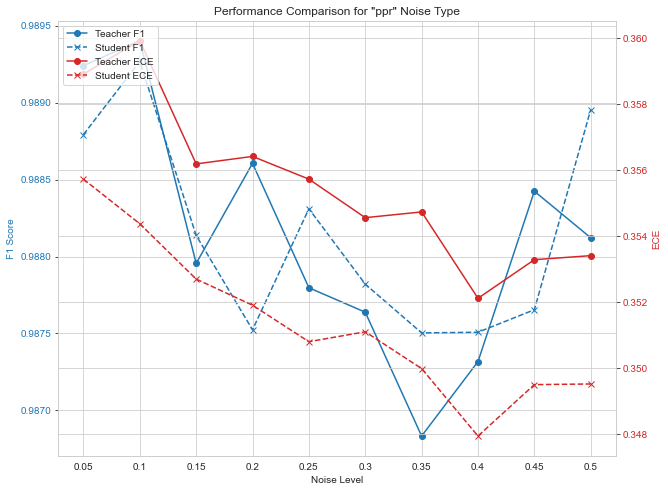

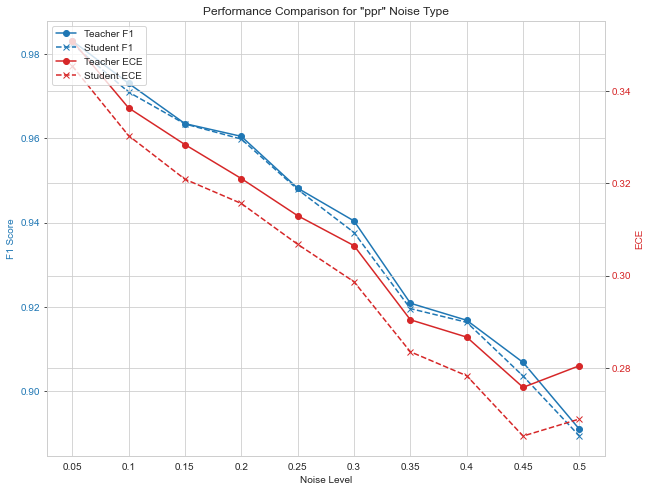

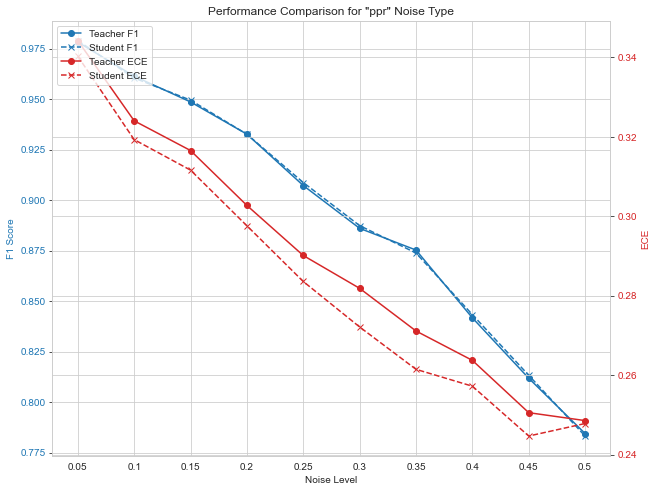

In [10]:
for noise_type in results_bert_teacher.keys():
    plot_noise_type(noise_type)